In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import qutip as qt
import sys
sys.path.append('../SimulationCode/')
from TelescopeSimulation import *
from fiber_network import FiberNetwork
from SiVnodes import SiV
from SiVgates import *
from Plots import *

In [2]:
# colors for plots to stay within paper pallete 
c1 = '#F15F57'
c2 = '#F6851F'
c3 = '#FDB913'
c4 = '#743062'
c5 = '#C87EB5'
c6 = '#4CC0B3'
c7 = '#1C9AAA'

In [3]:
# Create SiVs, all numbers in MHz:

#Server A, G12
siv_a = SiV(kappa_in= (74.9 - 54.5)*(10**3), kappa_w= (54.5)*(10**3), g=5.6*(10**3), wCav = (0)*(10**3), 
             wSiv = -(479.8 -639.6)*(10**3), dwEl = 0.5*(10**3)) # G12
#Server B, B16
siv_b = SiV(kappa_in= (43.5 - 26.0)*(10**3), kappa_w= (26.0)*(10**3), g=8.5*(10**3), wCav = (0)*(10**3), 
             wSiv = -(804.9 -657.6)*(10**3), dwEl = -0.5*(10**3)) # B16

## Setup Two-Node experiments in B16-G12

In [4]:
# Create Networks:
g12_b16_network = FiberNetwork(siv_a, siv_b) # this device is now in B16 fridge

# Create Simulation:
sim2 = TelescopeSimulation(g12_b16_network)

In [5]:
# Setup efficiencies

g12_b16_network.fibercoupling_eff = 0.6
g12_b16_network.tdi_eff = 0.35*0.3
g12_b16_network.snspd_eff = 0.9
g12_b16_network.detection_eff
g12_b16_network.detection_eff_reset()
g12_b16_network.link_efficiency = (g12_b16_network.fibercoupling_eff**2)*0.05*0.64

print('Detection efficientvy is = ', g12_b16_network.detection_eff)
print('Link efficientvy is = ', g12_b16_network.link_efficiency)

Detection efficientvy is =  0.0567
Link efficientvy is =  0.011519999999999999


In [6]:
# gate fidelities
b16_mwfid = 0.99
g12_mwfid = 0.98

#### Move the SiV to the desired contrast point

In [91]:
b16_contrast = 25 # range 18 - 30
g12_contrast = 20 # range 12 - 20

siv_b.set_contrast(b16_contrast)
actual_contrast_b16 = siv_b.get_best_contrast()
print("B16 contrast is set to = ", actual_contrast_b16)

siv_a.set_contrast(g12_contrast)
actual_contrast_g12 = siv_a.get_best_contrast()
print("G12 contrast is set to = ", actual_contrast_g12)

new contrast 27.979731852612364
B16 contrast is set to =  27.979731852612364
new contrast 22.984605715760683
G12 contrast is set to =  22.984605715760683


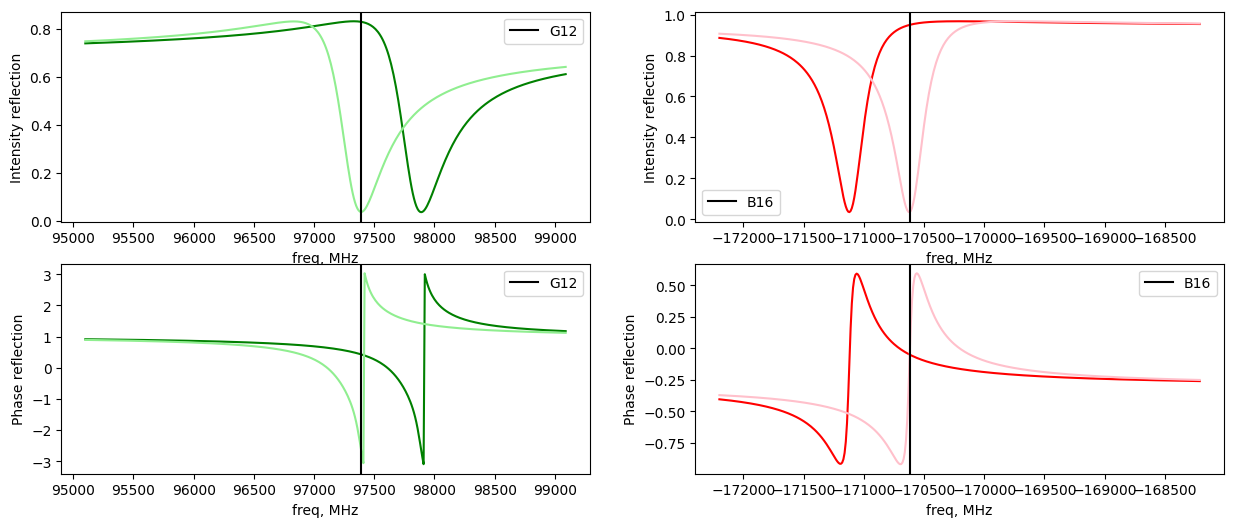

In [92]:
## Plot 
# generate plots of reflectivity

wl_A = siv_a.get_plotaxis()
wl_B = siv_b.get_plotaxis()

wl_read_optimum_A = siv_a.freq_optimum()
wl_read_optimum_B = siv_b.freq_optimum()

figure, ax = plt.subplots(2, 2, figsize=(15, 6))

ax[0,0].plot(wl_A, np.abs(siv_a.cav_refl(wl_A)['refl_refl'])**2, color = 'green')
ax[0,0].plot(wl_A, np.abs(siv_a.cav_refl(wl_A)['nonrefl_refl'])**2,color = 'lightgreen')
ax[0,0].set_xlabel('freq, MHz')
ax[0,0].set_ylabel('Intensity reflection')
ax[0,0].axvline(x = wl_read_optimum_A, color = 'black', label = 'G12')
ax[0,0].legend()

ax[0,1].plot(wl_B, np.abs(siv_b.cav_refl(wl_B)['refl_refl'])**2, color = 'red')
ax[0,1].plot(wl_B, np.abs(siv_b.cav_refl(wl_B)['nonrefl_refl'])**2, color = 'pink')
ax[0,1].set_xlabel('freq, MHz')
ax[0,1].set_ylabel('Intensity reflection')
ax[0,1].axvline(x = wl_read_optimum_B, color = 'black', label = 'B16')
ax[0,1].legend()

ax[1,0].plot(wl_A, np.angle(siv_a.cav_refl(wl_A)['refl_refl']), color = 'green')
ax[1,0].plot(wl_A, np.angle(siv_a.cav_refl(wl_A)['nonrefl_refl']),color = 'lightgreen')
ax[1,0].set_xlabel('freq, MHz')
ax[1,0].set_ylabel('Phase reflection')
ax[1,0].axvline(x = wl_read_optimum_A, color = 'black', label = 'G12')
ax[1,0].legend()

ax[1,1].plot(wl_B, np.angle(siv_b.cav_refl(wl_B)['refl_refl']), color = 'red')
ax[1,1].plot(wl_B, np.angle(siv_b.cav_refl(wl_B)['nonrefl_refl']), color = 'pink')
ax[1,1].set_xlabel('freq, MHz')
ax[1,1].set_ylabel('Phase reflection')
ax[1,1].axvline(x = wl_read_optimum_B, color = 'black', label = 'B16')
ax[1,1].legend()

plt.show()

## B16-G12 serial entanglement

##### Single run

In [99]:
imperfections ={'contrast_noise': 0, #(0 not noisy or 1 noisy)
                'contrast': 'real', #'real'
                'tdinoise': 0.1, #np.pi/25, #'real'
                'mw': 'real', # or perfect
                'mw_noise': 1, #(0 is stable or 1 noisy/underotates overroates every experimental shot)
                'mw_fid_num': [b16_mwfid, b16_mwfid] # default fidelities
               }
mu = 0.1
# e1e2
ee_initial = qt.tensor(rho_ideal_Xp, rho_ideal_Xp)

In [100]:
rho = serial_entanglement_ee(ee_initial, imperfections, mu)
print(rho)
rho = rho[0]


(Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.53367061+2.57440809e-17j -0.12639443-9.05976932e-03j
  -0.14436651-3.02371234e-02j  0.43423323-2.84785577e-02j]
 [-0.12639443+9.05976932e-03j  0.03254038+1.16433574e-18j
   0.03616561+4.61100013e-03j -0.10267777+1.35845637e-02j]
 [-0.14436651+3.02371234e-02j  0.03616561-4.61100013e-03j
   0.0459524 +9.00734136e-18j -0.1090394 +3.49864393e-02j]
 [ 0.43423323+2.84785577e-02j -0.10267777-1.35845637e-02j
  -0.1090394 -3.49864393e-02j  0.3878366 +2.85659499e-18j]], np.int64(0), 4.397273940277225e-06, 5.9424810586094664e-06, 1.0339754998886691e-05)


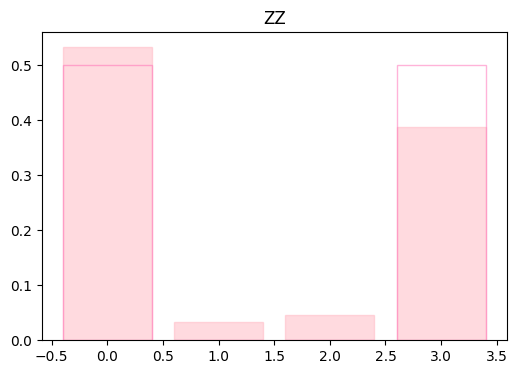

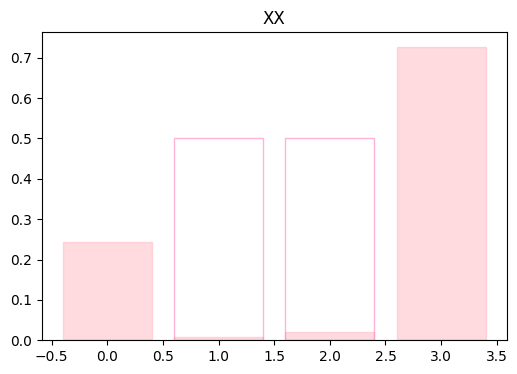

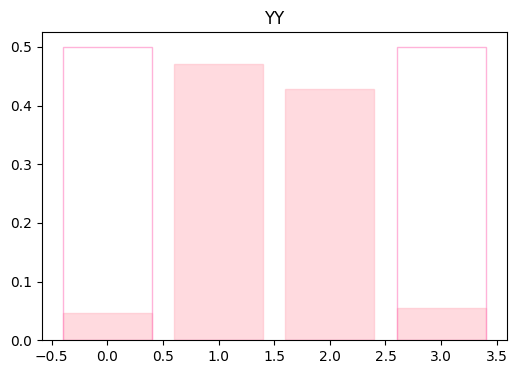

In [101]:
ZZ_tom = elel_bell_state_Ztomography(rho)
XX_tom = elel_bell_state_Xtomography(rho)
YY_tom = elel_bell_state_Ytomography(rho)

bell_state_barplotZZ(ZZ_tom)
bell_state_barplotXX(XX_tom)
bell_state_barplotYY(YY_tom)

#### Run as a fucntion of mu

In [ ]:
n_rounds = 2
mu_list = np.linspace(0.001, 0.7, 4)

rates_apd1_apd2 = np.empty((0, 2), dtype=float)
rho_mu_n_array = np.empty((0, n_rounds, 2, 2), dtype=complex)

#phi list
for i in range(len(mu_list)):
    mu = mu_list[i]
    print("mu = ", mu)

    # my list
    rho_n_array = np.empty((0, 4, 4), dtype=complex)
    
    for i in range(n_rounds): 
        rho, quantum_measurement, brate_apd_1, brate_apd_2, brate_tot  = serial_entanglement_ee(ee_initial, imperfections, mu)
        rho_n_array = np.vstack([rho_n_array, [rho]])
        print(quantum_measurement, brate_apd_1, brate_apd_2, brate_tot)
    # rates_apd1_apd2 = np.append(rates_apd1_apd2, [rho_init_xp[2:4]])
    
    # rho_phi_n_array_s = np.vstack([rho_phi_n_array_s, [rho_n_array_s]])
    # rho_phi_n_array_cl = np.vstack([rho_phi_n_array_cl, [rho_n_array_cl]])

# rho_mw_phi_n_array_s= np.vstack([rho_mw_phi_n_array_s, [rho_phi_n_array_s]])
# rho_mw_phi_n_array_cl= np.vstack([rho_mw_phi_n_array_cl, [rho_phi_n_array_cl]])

mu =  0.001


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
def serial_entanglement_ee(ee_initial, imperfections, mu):
    """ Two qubit internode blind gate """

    if imperfections['contrast_noise'] == False:
        wl_1 = sim2.fiber_network.siv1.optimum_freq
        wl_2 = sim2.fiber_network.siv2.optimum_freq
        cav_refl_1 = sim2.fiber_network.siv1.cav_refl(wl_1)
        cav_refl_2 = sim2.fiber_network.siv2.cav_refl(wl_2)
            
    elif imperfections['contrast_noise'] == True:
        wl_1 = np.random.normal(loc=sim2.fiber_network.siv1.optimum_freq, scale=50)
        wl_2 = np.random.normal(loc=sim2.fiber_network.siv2.optimum_freq, scale=50)
        cav_refl_1 = sim2.fiber_network.siv1.cav_refl(wl_1)
        cav_refl_2 = sim2.fiber_network.siv1.cav_refl(wl_2)

    # I will assume the microwave fidelities are the same in both nodes
    fidel_values_pi_pi2 = {'pi': imperfections['mw_fid_num'][0],
                'pi_half': imperfections['mw_fid_num'][1]
                }        

    # 'real'/'perfect' and 'stable'/'noisy'
    gates = set_mw_fidelities(fid = imperfections['mw'], noise = imperfections['mw_noise'], fidel_val = fidel_values_pi_pi2)
    siv_beamsplitters1 = siv_beamsplitter_ee_e1_serial_(cav_refl_1, imperfections['contrast'])
    siv_beamsplitters2 = siv_beamsplitter_ee_e2_serial_(cav_refl_2, imperfections['contrast'])

    alpha = np.sqrt(mu)
    early_time_bin = qt.tensor(qt.coherent(N, alpha/np.sqrt(2)), qt.coherent(N, 0))
    late_time_bin = qt.tensor(qt.coherent(N, 0), qt.coherent(N, alpha/np.sqrt(2)))
    input_coh = (early_time_bin + late_time_bin)
    rho_0 = qt.tensor(ee_initial, qt.ket2dm(input_coh))

    # print('Initial number of photons per qubit =', (Noperator*rho_0.ptrace([1])).tr(),  (Noperator*rho_0.ptrace([2])).tr())

    ## First Node
    
    # reflect early
    rho_1 = siv_beamsplitters1[0]*(qt.tensor(rho_0, qt.fock_dm(N, 0)))*siv_beamsplitters1[0].dag()
    rho_2 = (siv_beamsplitters1[1]*(qt.tensor(rho_1, qt.fock_dm(N, 0)))*siv_beamsplitters1[1].dag()).ptrace([0, 1, 3, 4])

    # do a pi gate on the electron
    pi_oper = qt.tensor(gates['pi'], Id2, IdN, IdN)
    rho_3 = pi_oper*rho_2*pi_oper.dag()
    
    # print('The number of photons mid spin photon =', (Noperator*rho_2.ptrace([1])).tr(), (Noperator*rho_2.ptrace([2])).tr())

    # reflect late
    rho_4 = siv_beamsplitters1[0]*(qt.tensor(rho_3, qt.fock_dm(N, 0)))*siv_beamsplitters1[0].dag()
    rho_5 = (siv_beamsplitters1[1]*(qt.tensor(rho_4, qt.fock_dm(N, 0)))*siv_beamsplitters1[1].dag()).ptrace([0, 1, 3, 4])
    
    rho_6 = pi_oper*rho_5*pi_oper.dag()

    ## Link loss

    eff = sim2.fiber_network.link_efficiency
    rho_7 = loss_photonqubit_ee_serial(rho_6, eff)

    ## Second Node

    # reflect early
    rho_8 = siv_beamsplitters2[0]*(qt.tensor(rho_7, qt.fock_dm(N, 0)))*siv_beamsplitters2[0].dag()
    rho_9 = (siv_beamsplitters2[1]*(qt.tensor(rho_8, qt.fock_dm(N, 0)))*siv_beamsplitters2[1].dag()).ptrace([0, 1, 3, 4])

    # do a pi gate on the electron
    pi_oper = qt.tensor(Id2, gates['pi'], IdN, IdN)
    rho_10 = pi_oper*rho_9*pi_oper.dag()
    
    # print('The number of photons mid spin photon =', (Noperator*rho_2.ptrace([1])).tr(), (Noperator*rho_2.ptrace([2])).tr())

    # reflect late
    rho_11 = siv_beamsplitters2[0]*(qt.tensor(rho_10, qt.fock_dm(N, 0)))*siv_beamsplitters2[0].dag()
    rho_12 = (siv_beamsplitters2[1]*(qt.tensor(rho_11, qt.fock_dm(N, 0)))*siv_beamsplitters2[1].dag()).ptrace([0, 1, 3, 4])
    
    rho_13 = pi_oper*rho_12*pi_oper.dag()

    ## Detection loss

    eff = sim2.fiber_network.detection_eff
    rho_14 = loss_photonqubit_ee_serial(rho_13, eff)

    ## Measure photon in X basis
    phi = 0
    rho_15 = phi_photon_measurement_ee_serial(rho_14, phi, tdi_noise = imperfections['tdinoise'])

    return rho_15

In [13]:
def elel_bell_state_Ztomography(rho):
    ZpZp = qt.fidelity(rho, qt.tensor(rho_ideal_Zp, rho_ideal_Zp))**2
    ZpZm = qt.fidelity(rho, qt.tensor(rho_ideal_Zp, rho_ideal_Zm))**2
    ZmZp = qt.fidelity(rho, qt.tensor(rho_ideal_Zm, rho_ideal_Zp))**2
    ZmZm = qt.fidelity(rho, qt.tensor(rho_ideal_Zm, rho_ideal_Zm))**2
    
    ZZ = [ZpZp/(ZpZp+ZpZm+ZmZp+ZmZm), ZpZm/(ZpZp+ZpZm+ZmZp+ZmZm), ZmZp/(ZpZp+ZpZm+ZmZp+ZmZm), ZmZm/(ZpZp+ZpZm+ZmZp+ZmZm)]
    return ZZ

def elel_bell_state_Xtomography(rho):
    XpXp = qt.fidelity(rho, qt.tensor(rho_ideal_Xp, rho_ideal_Xp))**2
    XpXm = qt.fidelity(rho, qt.tensor(rho_ideal_Xp, rho_ideal_Xm))**2
    XmXp = qt.fidelity(rho, qt.tensor(rho_ideal_Xm, rho_ideal_Xp))**2
    XmXm = qt.fidelity(rho, qt.tensor(rho_ideal_Xm, rho_ideal_Xm))**2
    XX = [XpXp/(XpXp+XpXm+XmXp+XmXm), XpXm/(XpXp+XpXm+XmXp+XmXm), XmXp/(XpXp+XpXm+XmXp+XmXm), XmXm/(XpXp+XpXm+XmXp+XmXm)]

    return XX

def elel_bell_state_Ytomography(rho):
    YpYp = qt.fidelity(rho, qt.tensor(rho_ideal_Yp, rho_ideal_Yp))**2
    YpYm = qt.fidelity(rho, qt.tensor(rho_ideal_Yp, rho_ideal_Ym))**2
    YmYp = qt.fidelity(rho, qt.tensor(rho_ideal_Ym, rho_ideal_Yp))**2
    YmYm = qt.fidelity(rho, qt.tensor(rho_ideal_Ym, rho_ideal_Ym))**2
    
    YY = [YpYp/(YpYp+YpYm+YmYp+YmYm), YpYm/(YpYp+YpYm+YmYp+YmYm), YmYp/(YpYp+YpYm+YmYp+YmYm), YmYm/(YpYp+YpYm+YmYp+YmYm)]
    return YY

## B16-G12 parallel entanglement